In [2]:
# Cell 1
import os, random
from PIL import Image, UnidentifiedImageError
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create outputs folder to save figures
os.makedirs("../outputs", exist_ok=True)


Matplotlib is building the font cache; this may take a moment.


In [4]:
# Cell 2
# لو عملتي split استخدمي "data/split" أو لو مش عملتي استخدمي "data/PlantVillage"
DATA_DIR = "../data/images"   # عدّلي لو مكان الداتا مختلف
print("DATA_DIR =", DATA_DIR)


DATA_DIR = ../data/images


In [5]:
# Cell 3
classes = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR,d))]
classes.sort()
print("Number of classes:", len(classes))

class_counts = {}
for cls in classes:
    cls_path = os.path.join(DATA_DIR, cls)
    imgs = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path,f))]
    class_counts[cls] = len(imgs)

# طباعة أول 10 للمعاينة
for k,v in list(class_counts.items())[:10]:
    print(f"{k}: {v}")


Number of classes: 14
Apple___Apple_scab: 630
Apple___Black_rot: 621
Apple___Cedar_apple_rust: 275
Apple___healthy: 1645
Blueberry___healthy: 1502
Cherry_(including_sour)___Powdery_mildew: 1052
Cherry_(including_sour)___healthy: 854
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 513
Corn_(maize)___Common_rust_: 1192
Corn_(maize)___Northern_Leaf_Blight: 985


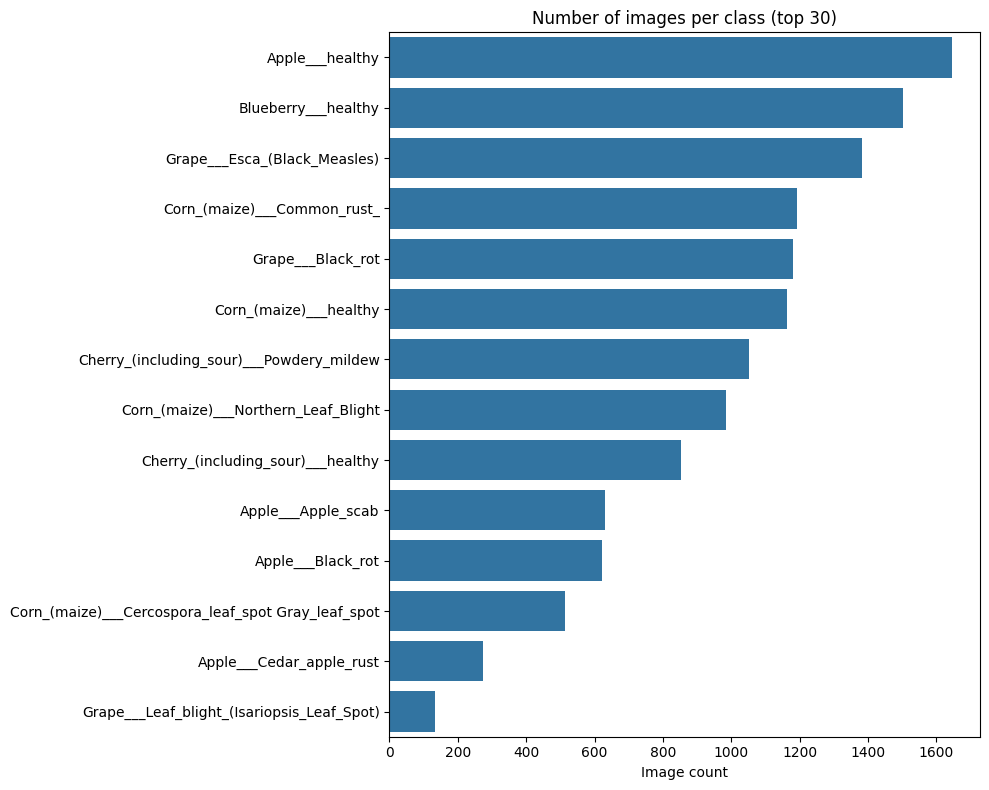

In [6]:
# Cell 4
plt.figure(figsize=(10,8))
sorted_items = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
names = [x[0] for x in sorted_items]
vals  = [x[1] for x in sorted_items]

sns.barplot(y=names[:30], x=vals[:30])   # عرض أول 30 صنف
plt.title("Number of images per class (top 30)")
plt.xlabel("Image count")
plt.tight_layout()
plt.savefig("../outputs/class_counts_top30.png", dpi=200)
plt.show()


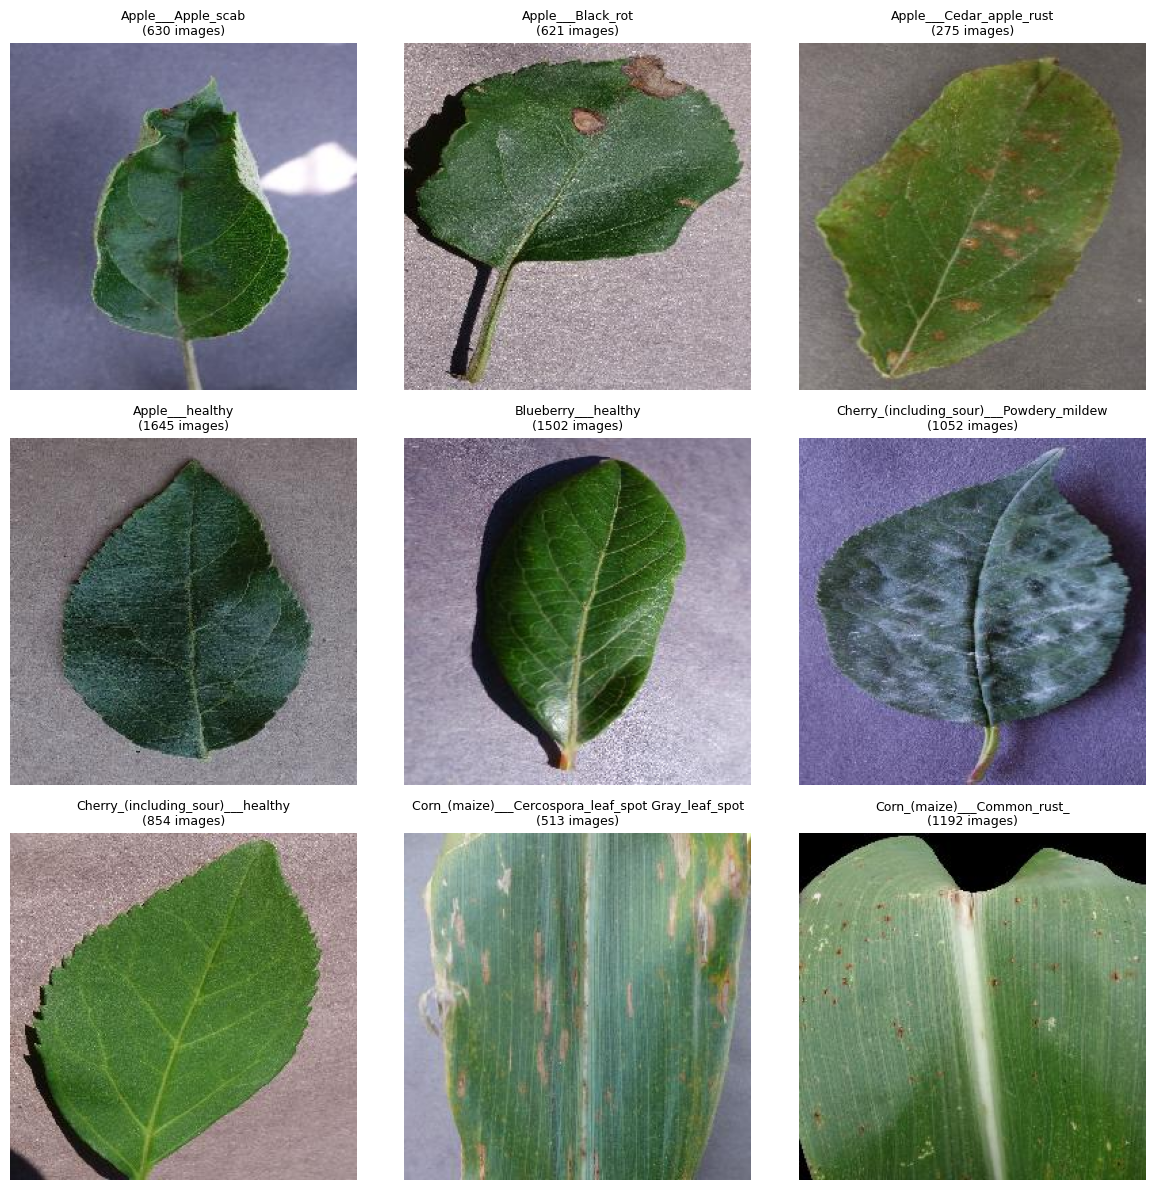

In [7]:
# Cell 5
plt.figure(figsize=(12,12))
sample_classes = classes[:9]   # غيّري الرقم لو عايزة 12 مثلاً
for i, cls in enumerate(sample_classes):
    cls_path = os.path.join(DATA_DIR, cls)
    imgs = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path,f))]
    if not imgs: continue
    img_file = random.choice(imgs)
    img = Image.open(os.path.join(cls_path, img_file)).convert("RGB")
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(f"{cls}\n({len(imgs)} images)", fontsize=9)
    plt.axis("off")
plt.tight_layout()
plt.savefig("../outputs/sample_grid_3x3.png", dpi=200)
plt.show()


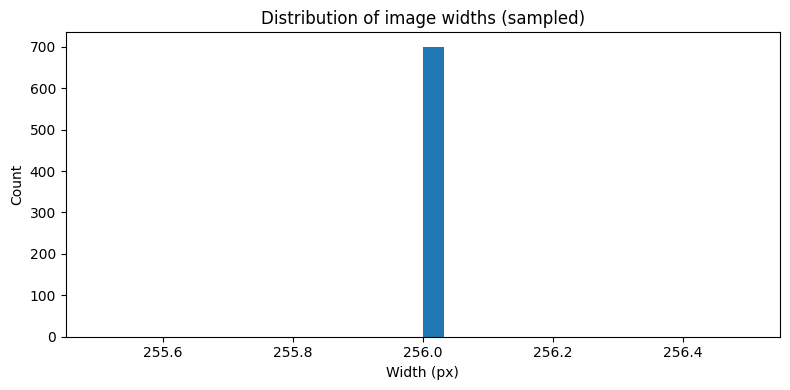

In [8]:
# Cell 6
sizes = []
for cls in classes[:50]:   # عينة مبدئية لتسريع التحليل
    cls_path = os.path.join(DATA_DIR, cls)
    imgs = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path,f))]
    for f in imgs[:50]:
        try:
            w,h = Image.open(os.path.join(cls_path,f)).size
            sizes.append((w,h))
        except UnidentifiedImageError:
            continue

sizes = np.array(sizes)
if sizes.size:
    plt.figure(figsize=(8,4))
    plt.hist(sizes[:,0], bins=30)
    plt.title("Distribution of image widths (sampled)")
    plt.xlabel("Width (px)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("../outputs/width_hist.png", dpi=200)
    plt.show()
else:
    print("No sizes collected (check DATA_DIR)")


In [9]:
# Cell 7
bad_files = []
for cls in classes:
    cls_path = os.path.join(DATA_DIR, cls)
    for f in os.listdir(cls_path):
        fp = os.path.join(cls_path, f)
        try:
            img = Image.open(fp)
            img.verify()
        except Exception:
            bad_files.append(fp)

print("Found corrupted/invalid image files:", len(bad_files))
# احفظ لملف نصي
if bad_files:
    with open("../outputs/bad_files.txt", "w", encoding="utf-8") as fh:
        fh.write("\n".join(bad_files))


Found corrupted/invalid image files: 0


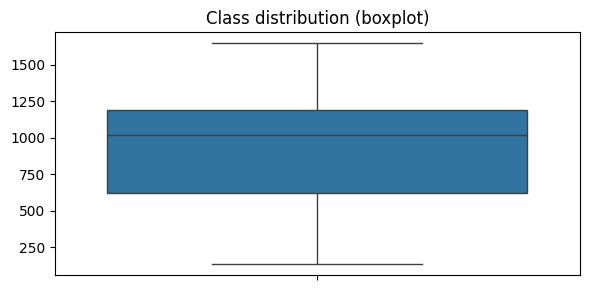

In [10]:
# Cell 8
vals = np.array(list(class_counts.values()))
plt.figure(figsize=(6,3))
sns.boxplot(vals)
plt.title("Class distribution (boxplot)")
plt.tight_layout()
plt.savefig("../outputs/class_boxplot.png", dpi=200)
plt.show()


In [11]:
# Cell 9
total_images = sum(class_counts.values())
min_count = min(class_counts.values())
max_count = max(class_counts.values())
print(f"Total images: {total_images}")
print(f"Class count range: min={min_count}, max={max_count}")
print("Recommendations:")
print("- If some classes are very small, consider augmentation for those classes.")
print("- Remove or replace corrupted images listed in outputs/bad_files.txt (if any).")


Total images: 13128
Class count range: min=134, max=1645
Recommendations:
- If some classes are very small, consider augmentation for those classes.
- Remove or replace corrupted images listed in outputs/bad_files.txt (if any).
